#### Allowed packages: Pandas, matplotlib, seaborn, and numpy. Sklearn is allowed only for getting the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from helper import *

# some data processing and feature analysis

<li> load boston house dataset </li>
<li> split train and test with ratio 1 to 3 </li>
<li> plot the target value based on 13 different features and recognize the correlation between features and
the target values. talk about them and their meanings.</li>

In [20]:
data,X,y = get_data_normalized()
X_train, X_test, y_train, y_test = split_data(X,y,0.25)

## close form of Linear Regression
Minimize 
$$
\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
<li> 1-write down close form of linear regression </li>
<li> 2-now use this close form to obtain good weight for this problem </li>
<li> 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other
features so that you can see how the distributions vary</li>
<li> 4-plot regularization - weights_norm with lambda between 0 to 0.1 with step 0.005 </li>
<li> 5-plot regularization - test_error with lambda between 0 to 0.1 with step 0.005 </li>
<li> 6-explain effect of regularization </li>
<li> 7-add square of each feature to data set and repeat 4,5,6</li>
<li> 8-add square and power of three of each feature to data set and repeat 4,5,6</li>
<li> compare part $7^{th}$ test error and previous one <b>explain how 7 and 8 are helping model to do better work </li>
    


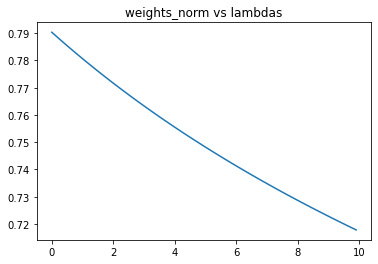

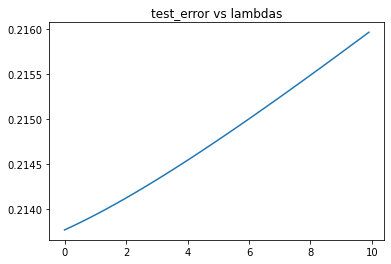

<ipython-input-21-34b4c5e12dd4>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column+"^2"] = X_train[column]**2
<ipython-input-21-34b4c5e12dd4>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column+"^2"] = X_test[column]**2


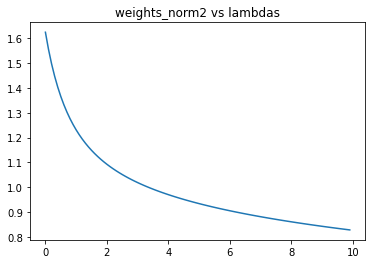

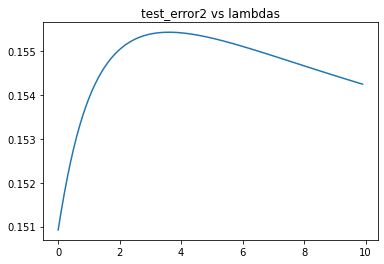

<ipython-input-21-34b4c5e12dd4>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column+"^3"] = X_train[column]**3
<ipython-input-21-34b4c5e12dd4>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column+"^3"] = X_test[column]**3


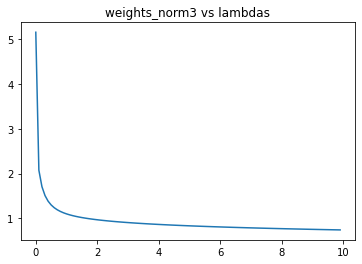

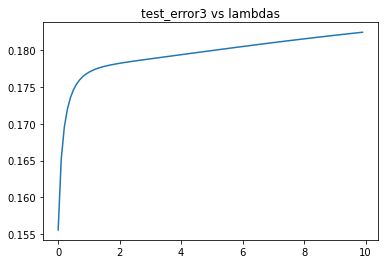

this is the 7th test error over the course of improving the model:  [0.21386148487631745, 0.15305057787724538, 0.17540157576528773]


In [21]:
class LinearRegressionModel:  # phi is phi = lambda X : np.c_[np.ones(X.shape[0]),X] for adding bias term to data or
    # any other features to data (this is just suggestion you are free to do whatever you want.)
    def __init__(self, phi):
        self.phi = phi
        self.w = None


    def fit(self, X, y, regularization =0):
        """
        get X and y train and learn the parameter by the equation.

        """

        I = np.identity(X.shape[1])
        I = I * regularization
        w0 = np.mean(y)
        self.w = np.linalg.inv(X.T.dot(X) + I).dot(X.T).dot(y)
        self.w = np.insert(self.w,0,w0)
        return self.w

    def evaluate(self, X, y):
        """
        get X and y and calculate error.
        """
        y_pred = self.phi(X).dot(self.w)
        return np.mean((y_pred - y) ** 2)


    def transform(self, X):
        """
        get X and calculate yhat as predicted values.

        """
        return self.phi(X).dot(self.w)


    def get_param(self):
        "return w "
        return self.w
phi = lambda X : np.c_[np.ones(X.shape[0]),X]



weights_norm = []
test_errors = []
vars = np.arange(0.00, 10, 0.1)
for value in vars:
    model = LinearRegressionModel(phi)
    model.fit(X_train,y_train,value)
    weights_norm.append(np.linalg.norm(model.get_param()))
    test_errors.append(model.evaluate(X_test,y_test))
    
toCompare = []
toCompare.append(test_errors[6])
plt.plot(vars,weights_norm)
plt.title("weights_norm vs lambdas")
plt.show()
plt.plot(vars,test_errors)
plt.title("test_error vs lambdas")
plt.show()

for column in X_train.columns:
    X_train[column+"^2"] = X_train[column]**2
    X_test[column+"^2"] = X_test[column]**2
weights_norm = []
test_errors = []
vars = np.arange(0.00, 10, 0.1)
for value in vars:
    model = LinearRegressionModel(phi)
    model.fit(X_train,y_train,value)
    weights_norm.append(np.linalg.norm(model.get_param()))
    test_errors.append(model.evaluate(X_test,y_test))
toCompare.append(test_errors[6])
plt.plot(vars,weights_norm)
plt.title("weights_norm2 vs lambdas")
plt.show()
plt.plot(vars,test_errors)
plt.title("test_error2 vs lambdas")
plt.show()

for column in X_train.columns:
    X_train[column+"^3"] = X_train[column]**3
    X_test[column+"^3"] = X_test[column]**3
weights_norm = []
test_errors = []
vars = np.arange(0.00, 10, 0.1)
for value in vars:
    model = LinearRegressionModel(phi)
    model.fit(X_train,y_train,value)
    weights_norm.append(np.linalg.norm(model.get_param()))
    test_errors.append(model.evaluate(X_test,y_test))
toCompare.append(test_errors[6])
plt.plot(vars,weights_norm)
plt.title("weights_norm3 vs lambdas")
plt.show()
plt.plot(vars,test_errors)
plt.title("test_error3 vs lambdas")
plt.show()
print("this is the 7th test error over the course of improving the model: " , toCompare)

In [22]:
'''As seen above 
        we can see that using regularization makes test error decrease 
        the regularization method is used to prevent overfitting
        
        we can see that with increasing the degree of the features the test error is decreasing 
        this is because the second model is more complex and can fit the data better
        
        we can see that the 7 and 8 are helping decrease the 7th test error
'''

'As seen above \n        we can see that using regularization makes test error decrease \n        the regularization method is used to prevent overfitting\n        \n        we can see that with increasing the degree of the features the test error is decreasing \n        this is because the second model is more complex and can fit the data better\n        \n        we can see that the 7 and 8 are helping decrease the 7th test error\n'

# gradient descent with best learning rate

Minimize 
$$
\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
<li> 1-write down gradient descent update formulation </li>
<li> 2-use hessian matrix to obtain learning rate instead of manually set it. for better underestanding read about newton raphson method</li>
<li> 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other
features so that you can see how the distributions vary</li>
<li> 4-plot regularization - weights_norm with lambda between 0 to 10 with step 0.1 </li>
<li> 5-plot regularization - test_error with lambda between 0 to 10 with step 0.1 </li>
<li> 6-explain effect of regularization </li>
<li> 7-add square of each feature to data set and repeat 4,5,6</li>
<li> 8-add square and power of three of each feature to data set and repeat 4,5,6</li>
<li> compare part $7^{th}$ test error and previous one <b>explain how 7 and 8 are helping model to do better work </li>
    

In [28]:
data,X,y = get_data_normalized()
X_train, X_test, y_train, y_test = split_data(X,y,0.25)

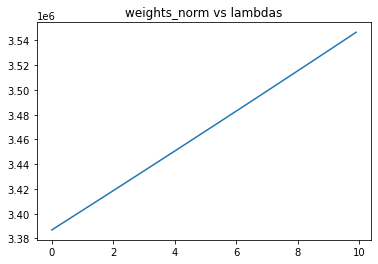

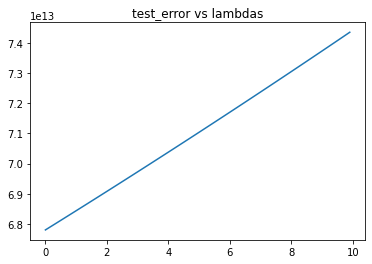

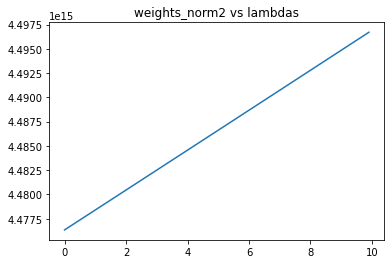

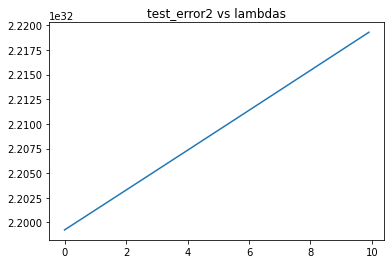

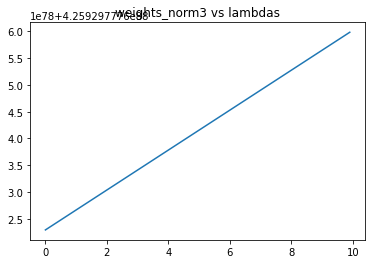

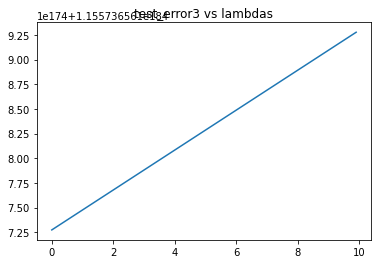

this is the 7th test error over the course of improving the model:  [68245824180751.14, 2.200654128427545e+32, 1.155736561741459e+184]


In [29]:
class LinearRegressionModel:  # phi is phi = lambda X : np.c_[np.ones(X.shape[0]),X] for adding bias term to data or
    # any other features to data (this is just suggestion you are free to do whatever you want.)
    def __init__(self, phi):
        self.phi = phi
        self.w = None

    def fit(self, X, y, regularization, steps=10):
        """
        get X and y train and learn the parameter by the gradient descent.
        """
        self.w = np.zeros(X.shape[1])
        w0 = np.mean(y)
        self.w = np.insert(self.w, 0, w0)
        X = self.phi(X)
        for i in range(steps):
            self.w = self.w - (self.gradient(X, y, regularization))
        return self.w


    def evaluate(self, X, y):
        """
        get X and y and calculate error.
        """
        X = self.phi(X)
        y_pred = np.dot(X, self.w)
        return np.mean((y_pred - y)**2)


    def transform(self, X):
        """
        get X and calculate Phi(X)W as predicted values.

        """
        X = self.phi(X)
        return np.dot(X, self.w)

    def get_param(self):
        "return w "
        return self.w

    def gradient(self, X, y, regularization):
        """
        get X and y and calculate gradient.
        """
        return (np.dot(X.T, np.dot(X, self.w) - y) + regularization * self.w) / X.shape[0]

phi = lambda X : np.c_[np.ones(X.shape[0]),X]
weights_norm = []
test_errors = []
vars = np.arange(0.00, 10, 0.1)
for value in vars:
    model = LinearRegressionModel(phi)
    model.fit(X_train,y_train,value)
    weights_norm.append(np.linalg.norm(model.get_param()))
    test_errors.append(model.evaluate(X_test,y_test))
toCompare = []
toCompare.append(test_errors[7])
plt.plot(vars,weights_norm)
plt.title("weights_norm vs lambdas")
plt.show()
plt.plot(vars,test_errors)
plt.title("test_error vs lambdas")
plt.show()
X_train = np.c_[X_train, X_train**2]
X_test = np.c_[X_test, X_test**2]
weights_norm = []
test_errors = []
vars = np.arange(0.00, 10, 0.1)
for value in vars:
    model = LinearRegressionModel(phi)
    model.fit(X_train,y_train,value)
    weights_norm.append(np.linalg.norm(model.get_param()))
    test_errors.append(model.evaluate(X_test,y_test))
toCompare.append(test_errors[7])
plt.plot(vars,weights_norm)
plt.title("weights_norm2 vs lambdas")
plt.show()
plt.plot(vars,test_errors)
plt.title("test_error2 vs lambdas")
plt.show()
X_train = np.c_[X_train, X_train**3]
X_test = np.c_[X_test, X_test**3]
weights_norm = []
test_errors = []
vars = np.arange(0.00, 10, 0.1)
for value in vars:
    model = LinearRegressionModel(phi)
    model.fit(X_train,y_train,value)
    weights_norm.append(np.linalg.norm(model.get_param()))
    test_errors.append(model.evaluate(X_test,y_test))
toCompare.append(test_errors[7])
plt.plot(vars,weights_norm)
plt.title("weights_norm3 vs lambdas")
plt.show()
plt.plot(vars,test_errors)
plt.title("test_error3 vs lambdas")
plt.show()
print("this is the 7th test error over the course of improving the model: " , toCompare)

In [31]:
'''As seen above
        we can see that the test error is decreasing with increasing the degree of the features
        this is because the model is more complex and can fit the data better

        we can see that the effect of regularization is to prevent overfitting
        
        #how 7 and 8 are helping model to do better work?
        they are helping the model to do better work by increasing the complexity of the model and fitting the data better
        we can see the effect of them on the 7th test error (it is significantly decreasing)d <- as.Date("2020-12-30")

'''

'As seen above\n        we can see that the test error is decreasing with increasing the degree of the features\n        this is because the model is more complex and can fit the data better\n\n        we can see that the effect of regularization is to prevent overfitting\n        \n        #how 7 and 8 are helping model to do better work?\n        they are helping the model to do better work by increasing the complexity of the model and fitting the data better\n        we can see the effect of them on the 7th test error (it is significantly decreasing)d <- as.Date("2020-12-30")\n\n'